In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


This program tests different feature selection methods and their respective scores to see the impact of eliminating some features from the total number of features. We will be using forward feature selection which starts with 0 features and adds features up till the number of features mentioned. Backward feature selection method starts with all available features and eliminates the ones not as important, this method scores the features from most important to least. Lastly we will also use Recursive Feature Elimination (rfe) method which works similar to backward feature selection buw whereas bfe eliminates least significant feature on each sted rfe works on recursively ranks the importance of each feature in the entire set of features rather than only at a step. The model we would be using is logistic regression and the Dataset would be obesity.csv which has different variables about a persons lifestyle, family history and other variabler pertaining to health and y value is if the person experiences obesity as the column 


In [94]:
obesity = pd.read_csv("obese.txt")
obesity.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [59]:
X = obesity.drop(["NObeyesdad"],axis=1)
y = obesity["NObeyesdad"]

In [21]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X,y)
print(lr.score(X,y))  #specifying the model, here the model with all the features has score of 0.765.

0.7659876835622927


In [34]:
sfs = SFS(lr, k_features = 9, floating = False, forward = True, scoring = "accuracy", cv = 0)
sfs.fit(X,y) #Sequential forward seelction model.

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(9, 9), scoring='accuracy')

In [36]:
print(sfs.subsets_[9]["feature_names"]) #avg_score = 0.7835, removing some features in this model improved the accuracy score.
print(sfs.subsets_[9]["avg_score"])  

('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')
0.7835149218379914


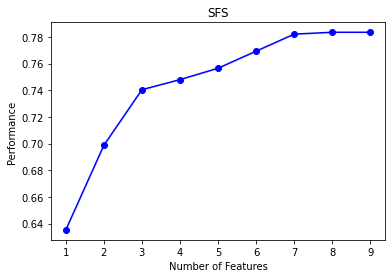

<Figure size 432x288 with 0 Axes>

In [97]:
plot_sfs(sfs.get_metric_dict())
plt.title("SFS")
plt.show()

plt.clf()

In [48]:
sbs = SFS(lr, k_features =7 , floating = False, forward = False, scoring = "accuracy", cv = 0)
sbs.fit(X,y)#sequential backward selection

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(7, 7), scoring='accuracy')

In [49]:
print(sbs.subsets_[7]["feature_names"]) #avg_score = 0.7640 removing some features decreased the accuracy somewhat.
print(sbs.subsets_[7]["avg_score"])

('Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Public_Transportation')
0.7640928469919469


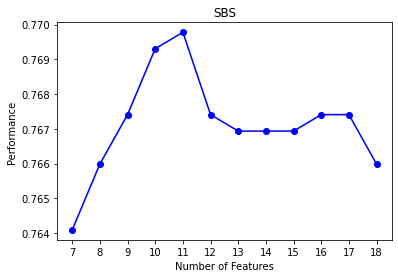

In [98]:
plot_sfs(sbs.get_metric_dict())
plt.title("SBS")
plt.show()

In [64]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

rfe = RFE(estimator = lr, n_features_to_select = 8)
rfe.fit(X,y) # Transforming the features to appropriate scales so our RFE modelcan compare their  relative importance.

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8)

In [86]:
support = rfe.support_
print(support)
features = obesity.columns.tolist()
features.remove("NObeyesdad")
print(features)
selected_features = []

[False  True  True  True  True False  True False False  True False False
 False  True False False False  True]
['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']


In [93]:
for i in range(len(support)):
    if support[i]==True:
        selected_features.append(features[i])
print(selected_features)
print(rfe.score(X,y)) # avg_score = 0.7679 #The score improved somewhat.

['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking']
0.7678825201326386
